In [0]:
import yfinance as yf
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# California Data

## unemployment

In [38]:
cali_unemployment = pd.read_csv('../data/cal_unemp.csv')
# cali_unemployment.set_index('DATE', inplace=True)
# cali_unemployment['DATE'].head()
cali_unemployment['year'] = cali_unemployment['DATE'].apply(lambda x: x[:4])
cali_unemployment = cali_unemployment[cali_unemployment['year'] == '2018']
cali_unemployment.set_index('DATE', inplace=True)
cali_unemployment.pop('year')
cali_unemployment.head()

# getting the specific dates for the california wildfire data
# cali_unemployment = cali_unemployment[cali_unemployment['DATE'][:4] == '2018']

,CAUR
DATE,
2018-01-01,4.4
2018-02-01,4.3
2018-03-01,4.3
2018-04-01,4.3
2018-05-01,4.3


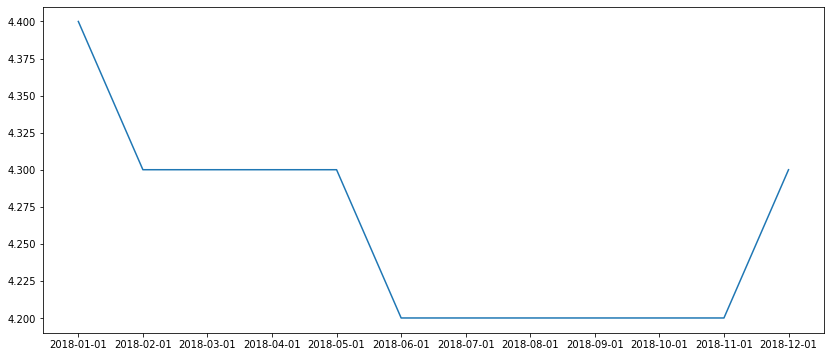

In [40]:
plt.figure(figsize=(14, 6))
plt.plot(cali_unemployment)

## income data

In [46]:
cali_income = pd.read_csv('../data/hourly_wages.csv')
cali_income.rename(columns={'SMU06000000500000003SA': 'hourly income'}, inplace=True)
cali_income['year'] = cali_income['DATE'].apply(lambda x: x[:4])
cali_income = cali_income[cali_income['year']=='2018']
cali_income.pop('year')
cali_income.set_index('DATE', inplace=True)
cali_income.head()

,hourly income
DATE,
2018-01-01,30.395316
2018-02-01,30.453160
2018-03-01,30.604875
2018-04-01,30.749458
2018-05-01,30.762934


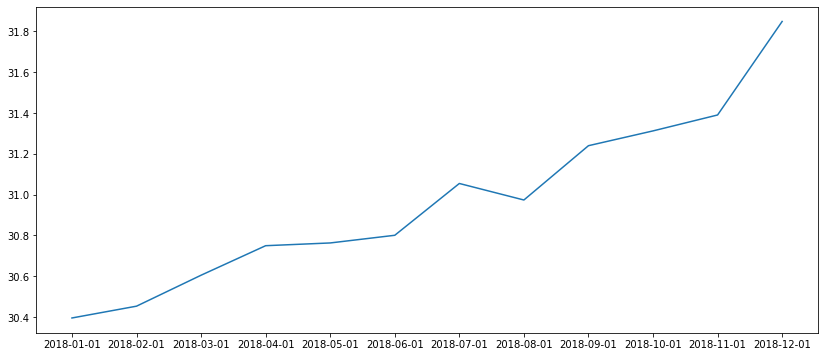

In [47]:
plt.figure(figsize=(14, 6))
plt.plot(cali_income)

In [77]:
print(cali_income['hourly income'].value_counts())
print(cali_unemployment['CAUR'].value_counts())

30.762934    1
30.749458    1
31.312023    1
30.453160    1
30.395316    1
30.604875    1
30.973427    1
31.848255    1
31.054377    1
31.239514    1
31.390042    1
30.800495    1
Name: hourly income, dtype: int64
4.2    6
4.3    5
4.4    1
Name: CAUR, dtype: int64


In [70]:
def normalize(data, column):
    data_min = data[column].min()
    data_max = data[column].max()
    data['norm'] = (data[column] - data_min) / (data_max - data_min)

normalize(cali_income, 'hourly income')
normalize(cali_unemployment, 'CAUR')

# making the difference dataframe
# diff_frame = cali_income.drop('hourly income', axis=1) + cali_unemployment.drop('CAUR', axis=1) / 2

In [71]:
diff_frame.head()

,norm
DATE,
2018-01-01,0.500000
2018-02-01,0.289811
2018-03-01,0.394231
2018-04-01,0.493742
2018-05-01,0.503016


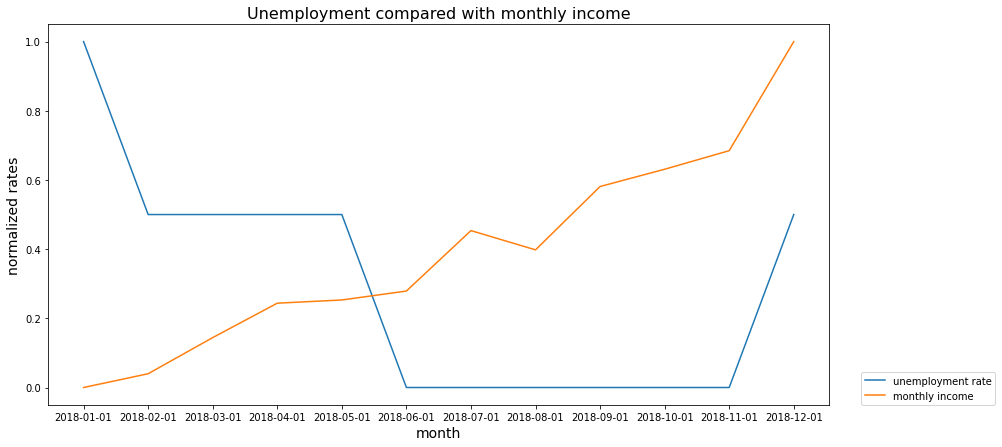

In [72]:
plt.figure(figsize=(14, 7))
plt.plot(cali_unemployment['norm'], label='unemployment rate')
plt.plot(cali_income['norm'], label='monthly income')
# plt.plot(diff_frame, label='difference')
plt.xlabel('month', fontsize=14)
plt.ylabel('normalized rates', fontsize=14)
plt.title('Unemployment compared with monthly income', fontsize=16)
plt.legend(loc=(1.04, 0))
plt.savefig('../data/figures/unemployment_vs_income.png')

# Stock data 

In [1]:
sectors = {'XLE': 'XOM', 
           'XLB': 'ECL',
           'XLI': 'LMT',
           'XLY': 'AMZN',
           'XLP': 'WMT',
           'XLV': 'JNJ',
           'XLF': 'JPM',
           'XLK': 'INTC',
           'XTL': 'GOOG',
           'XLU': 'DUK',
           'XLRE': 'SPG'}

In [2]:
import yfinance as yf
import numpy as np 
import pandas as pd 

class CompareLocal:

    def __init__(self, sectors, start_date, end_date):
        self.data = pd.DataFrame()
        self.sectors = sectors
        self.start_date = start_date
        self.end_date = end_date

    def get_ticker_data(self, stock):
        stock_ticker = yf.Ticker(stock)
        stcok_data = stock_ticker.history('1y', 
                                          interval='1d', 
                                          start=self.start_date, 
                                          end=self.end_date)
        return stcok_data['Close']

    def get_data(self):
        for stock in sectors:
            self.data[stock] = self.get_ticker_data(stock)


In [59]:
import matplotlib.pyplot as plt

class DataAnalyzer:

    def __init__(self, data):
        self.data = data 

    def normalize_dataframe(self):
        self.data_norm = pd.DataFrame()
        for stock in self.data.columns:
            data_min = self.data[stock].min()
            data_max = self.data[stock].max()
            self.data_norm[stock] = (self.data[stock] - data_min) / (data_max - data_min)

    # plotting generalized with passed data
    def plot_data(self, d, xlabel, ylabel, title, path):
        plt.figure(figsize=(14, 6))
        plt.plot(d)
        plt.xlabel(xlabel, fontsize=14)
        plt.ylabel(ylabel, fontsize=14)
        plt.title(title, fontsize=16)
        plt.legend(loc=(1.04,0))
        plt.savefig(path)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


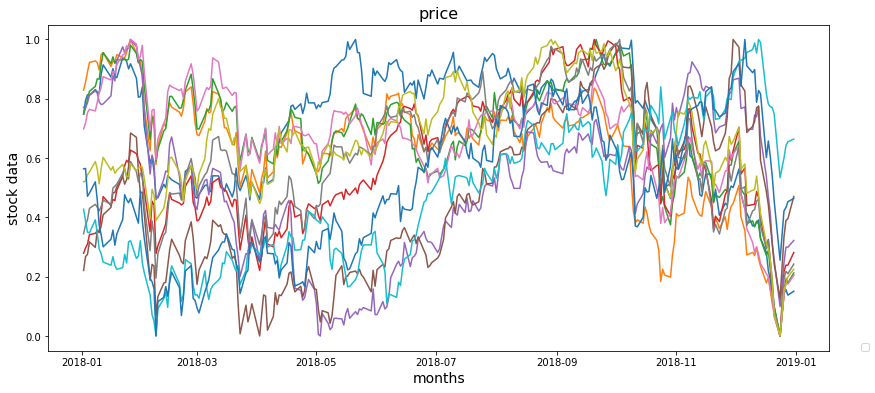

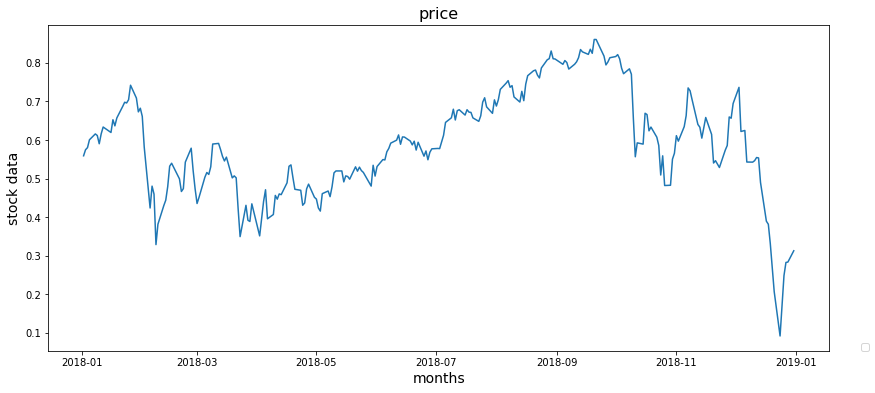

In [61]:
# main function when placing into folder
comp = CompareLocal(sectors, '2018-01-01', '2019-01-01')
comp.get_data()

# data comparison tool
d_analyze = DataAnalyzer(comp.data)
d_analyze.normalize_dataframe()

# plotting the graphs
d_analyze.plot_data(d_analyze.data_norm, 
                    'months', 
                    'stock data', 
                    'price', 
                    '../data/figures/all.png')
d_analyze.plot_data(d_analyze.data_norm.mean(axis=1), 
                    'months', 
                    'stock data', 
                    'price', 
                    '../data/figures/mean.png')


# tensorflow beginnings

In [5]:
import tensorflow as tf
import numpy as np 
import pandas as pd 
from tensorflow import keras

In [7]:
t = tf.constant(np.arange(0, 9).reshape(3, 3), dtype=tf.float32)

In [8]:
t

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[0., 1., 2.],
       [3., 4., 5.],
       [6., 7., 8.]], dtype=float32)>